In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

In [2]:
df = pd.read_csv("../dataset/facebook_comment_cleaned.tsv",sep='\t',encoding='utf-8')
df['token_arr'] = df['token'].apply(lambda x:eval(x))

def giveClass(score):
    if(score==-32 ):
        return -32
    if(score==0):return 0
    if(score>0):return 1
    if(score<0):return -1
df['class'] = df['score'].apply(giveClass)

In [3]:
scored = df[df['scoredAmt']>0]

In [4]:
comments = [i for i in scored['token_arr'].values]
vocabs = Counter([word for comment in comments for word in comment])
comments = [" ".join(i) for i in scored['token_arr'].values]

In [14]:
vocabs.most_common()

[(' ', 40593),
 ('ไม่', 6463),
 ('ได้', 4540),
 ('ๆ', 3170),
 ('มี', 3168),
 ('ใช้', 3165),
 ('จะ', 3048),
 ('ที่', 3013),
 ('มา', 2844),
 ('ไป', 2806),
 ('เลย', 2450),
 ('แล้ว', 2442),
 ('ครับ', 2354),
 ('นี้', 2303),
 ('ก็', 2292),
 ('ให้', 2216),
 ('ค่ะ', 2025),
 ('.', 1878),
 ('ว่า', 1853),
 ('แต่', 1801),
 ('ผม', 1757),
 ('มาก', 1712),
 ('ดี', 1678),
 ('เน็ต', 1575),
 ('ยัง', 1556),
 ('เดือน', 1542),
 ('เป็น', 1509),
 ('วัน', 1488),
 ('ต้อง', 1414),
 ('นะ', 1282),
 ('ทำ', 1168),
 ('เงิน', 1123),
 ('คะ', 1117),
 ('ใน', 991),
 ('ค่าย', 983),
 ('อยู่', 981),
 ('อยาก', 973),
 ('ของ', 968),
 ('บอก', 960),
 ('!', 926),
 ('อะไร', 919),
 ('ความ', 912),
 ('ราย', 898),
 ('โทร', 880),
 ('ย้าย', 847),
 ('เครื่อง', 835),
 ('ดู', 833),
 ('บาท', 830),
 ('สมัคร', 802),
 ('กับ', 799),
 ('เรา', 798),
 ('ด้วย', 795),
 ('อีก', 788),
 ('คน', 787),
 ('และ', 774),
 ('สัญญาณ', 771),
 ('แบบ', 758),
 ('การ', 755),
 ('ไหม', 739),
 ('ทรู', 734),
 ('กว่า', 734),
 ('ถ้า', 733),
 ('มัน', 731),
 ('หมด', 729),
 (

## Let's look at term frequency for each word

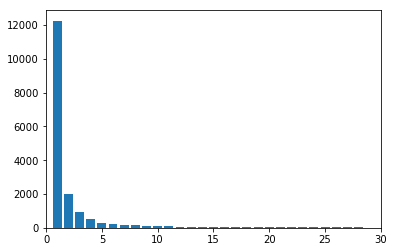

In [16]:
termWithFreq = Counter([i[1] for i in vocabs.most_common()])
plt.bar(list(termWithFreq.keys()),list(termWithFreq.values()))
plt.xlim(0,30)
plt.show()

In [5]:
%%time
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = [" "],   \
                             max_features = 10000)

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(comments)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
print("Done!")

Creating the bag of words...

Done!
CPU times: user 376 ms, sys: 6.85 s, total: 7.22 s
Wall time: 7.23 s


## Select only row with scores

In [6]:
%%time
X = train_data_features
y = scored['class'].values

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 189 µs


In [7]:
%%time
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

CPU times: user 176 ms, sys: 7.73 s, total: 7.91 s
Wall time: 7.91 s


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [15]:
%%time
clf1 = AdaBoostClassifier(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = MultinomialNB()
clf4 = MLPClassifier()
clf5 = LogisticRegression()
clf6 = KNeighborsClassifier()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 397 µs


In [16]:
%%time
clfs = [clf1,clf2,clf3,clf5,clf6]
names = ['Ada','RandomForest','MultinomialNB','Logistic Regression','KNeighbors']
for i,clf in enumerate(clfs):
    start = time.time()
    print("Start training model: %s"%names[i])
    clf.fit(X_train,y_train)
    end = time.time()
    print("Finished training in {} seconds".format(round(end - start),2))
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy: {}%".format(round((acc*100),2)))
    print(cm)

Start training model: Ada
Finished training in 88 seconds
Accuracy: 59.85%
[[522  77   9  27]
 [105 596  23  38]
 [143 102  49  80]
 [137  85  38 121]]
Start training model: RandomForest
Finished training in 9 seconds
Accuracy: 60.59%
[[490  74  40  31]
 [ 86 605  42  29]
 [ 84 120  90  80]
 [ 72  96  94 119]]
Start training model: MultinomialNB
Finished training in 7 seconds
Accuracy: 59.06%
[[337 232  19  47]
 [ 11 718  15  18]
 [ 21 195  54 104]
 [ 41 141  37 162]]
Start training model: Logistic Regression
Finished training in 7 seconds
Accuracy: 66.03%
[[563  40  16  16]
 [ 94 588  41  39]
 [105  84  86  99]
 [ 83  56  58 184]]
Start training model: KNeighbors
Finished training in 13 seconds
Accuracy: 53.25%
[[567  39  16  13]
 [222 423  78  39]
 [176  67  65  66]
 [157  50  83  91]]
CPU times: user 8min 21s, sys: 34.9 s, total: 8min 56s
Wall time: 8min 56s


In [ ]:
%%time
clf1 = RandomForestClassifier(n_estimators = 50,random_state=1,criterion='entropy')
clf2 = LogisticRegression()
clf3 = MLPClassifier(hidden_layer_sizes =(500,250),random_state = 1,verbose =True)

#We will choose RandomForest, LogisticRegression, and neural network to form ensemble model
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2), ('mlp', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(acc)
print(cm)

Iteration 1, loss = 1.09378561
Iteration 2, loss = 0.70715525
Iteration 3, loss = 0.48590157
Iteration 4, loss = 0.32923704
Iteration 5, loss = 0.24205899
Iteration 6, loss = 0.17118099
Iteration 7, loss = 0.14161105


In [14]:
%%time
from sklearn.naive_bayes import GaussianNB
start = time.time()
clf = GaussianNB()
print("Start training model: GaussianNB")
clf.fit(X_train,y_train)
end = time.time()
print("Finished training in {} seconds".format(round(end - start),2))
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: {}%".format(round((acc*100),2)))
print(cm)

Start training model: SVC
Finished training in 20 seconds
Accuracy: 34.99%
[[137  45 347 106]
 [ 65 248 320 129]
 [ 23  43 232  76]
 [ 26  28 191 136]]
CPU times: user 2.18 s, sys: 37 s, total: 39.2 s
Wall time: 39.2 s
